In [1]:
import glob
import os
from readfiles import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from lomapost import * #All functions defined within module lomapost
import h5py
%matplotlib inline

In [2]:
set_fig_props()

In [3]:
from IPython.display import clear_output
from IPython.display import Image

# Job selection

#### Modify p_folders vector for job selection:

In [4]:
p_folders=['/share/drive/toni/VDML/s10/02/']
#p_folders   = [p_results+ 'tests80', p_results+'Re160s20my1101',p_results+'Re160s40my1101'] #Define path of folders
#Option 2:  p_folders   = glob.glob(p_results+'Re160*my1101') #use pattern to define them
print p_folders                                    #print path folders
njobs = len(p_folders)                             #save number of jobs in njobs
l_sta_files = list(range(njobs))                   #initialize l_sta_files
l_spe_files = list(range(njobs))  
#Save all sta files list on l_sta_files for every job
for ijob in range(njobs):
    #l_sta_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.sta'))
    l_spe_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.spe'))
    #Checking:
    print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_spe_files[ijob][0],l_spe_files[ijob][-1])   

['/share/drive/toni/VDML/s10/02/']
job(1): 1st file = /share/drive/toni/VDML/s10/02/s10b_01_001.spe, last file = /share/drive/toni/VDML/s10/02/s10b_03_064.spe


In [5]:
#Total number of files for every job
nfiles=list(range(njobs))
#nfiles2=list(range(njobs))
for ijob in range(njobs):
    nfiles[ijob] = len(l_spe_files[ijob])
    #nfiles2[ijob] = len(l_spe_files[ijob])
print nfiles


[120]


In [6]:
nplane=-1 #mid plane
for ijob in range(njobs):
    print ijob
    for fspe,ispe in zip(l_spe_files[ijob],range(len(l_spe_files[ijob]))):
        print fspe

0
/share/drive/toni/VDML/s10/02/s10b_01_001.spe
/share/drive/toni/VDML/s10/02/s10b_01_002.spe
/share/drive/toni/VDML/s10/02/s10b_01_003.spe
/share/drive/toni/VDML/s10/02/s10b_01_004.spe
/share/drive/toni/VDML/s10/02/s10b_01_005.spe
/share/drive/toni/VDML/s10/02/s10b_01_006.spe
/share/drive/toni/VDML/s10/02/s10b_01_007.spe
/share/drive/toni/VDML/s10/02/s10b_01_008.spe
/share/drive/toni/VDML/s10/02/s10b_01_009.spe
/share/drive/toni/VDML/s10/02/s10b_01_010.spe
/share/drive/toni/VDML/s10/02/s10b_01_011.spe
/share/drive/toni/VDML/s10/02/s10b_01_012.spe
/share/drive/toni/VDML/s10/02/s10b_01_013.spe
/share/drive/toni/VDML/s10/02/s10b_01_014.spe
/share/drive/toni/VDML/s10/02/s10b_01_015.spe
/share/drive/toni/VDML/s10/02/s10b_01_016.spe
/share/drive/toni/VDML/s10/02/s10b_01_017.spe
/share/drive/toni/VDML/s10/02/s10b_01_018.spe
/share/drive/toni/VDML/s10/02/s10b_01_019.spe
/share/drive/toni/VDML/s10/02/s10b_01_020.spe
/share/drive/toni/VDML/s10/02/s10b_01_021.spe
/share/drive/toni/VDML/s10/02/s1

In [17]:
fspe = '/share/drive/toni/VDML/s10/02/s10b_01_033.spe';

# Read all data

In [18]:
#temp = workspe(fspe) #save the stats on the right place
nplane = -1
temp = workspe(fspe,nplane) #save the stats on the right place

ntotr=71424,nx=512,nz=192,nspec=31,nvar=12


In [19]:
y =  temp['y']
jsp = temp['jsp']
time = temp['time']

In [20]:
print y[jsp],time

[-101.43530031  -88.32653379  -76.41927583  -65.71352644  -56.20928561
  -47.90655335  -40.76344799  -34.58112449  -29.1465459   -24.27588119
  -19.81339612  -15.6303442   -11.62385759   -7.715838     -3.85184761
    3.85184761    7.715838     11.62385759   15.6303442    19.81339612
   24.27588119   29.1465459    34.58112449   40.76344799   47.90655335
   56.20928561   65.71352644   76.41927583   88.32653379  101.43530031
    0.19254946] [ 435.70147705]


In [27]:
nplane = np.where(y[jsp]>=32*0.6)[0][0]
print y[jsp][nplane]/32.0

0.619168628706


ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
525
['yjsp', 'jsp', 'time', 'y', 'kz', 'kx', 'SPEC']
(192, 12, 512)


(192, 512)
(192, 512)


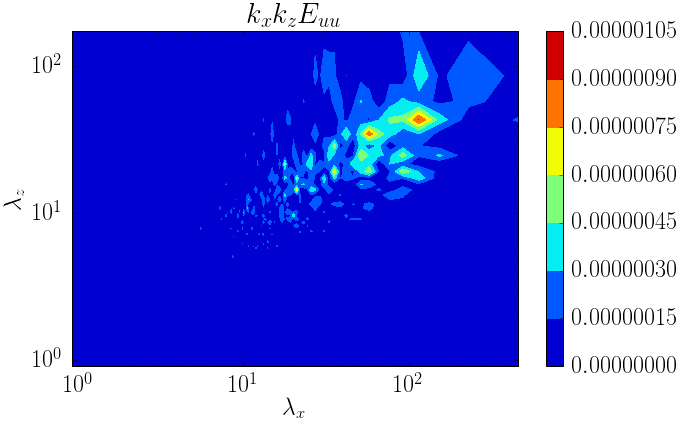

In [106]:
temp = workspe(fspe,nplane) #save the stats on the right place
ivar = 0
print temp['jsp'][nplane]
print temp.keys()
print np.shape(temp['SPEC'])

xlen=10.0;ylen=6
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
print np.shape(temp['SPEC'][:,ivar,:])
myspec = np.zeros([192,512])
print np.shape(myspec)
kx = temp['kx']
kz = temp['kz']
for i in range(0,len(kx)):
    for k in range(0,len(kz)):
        myspec[k,i] = kx[i]*kz[k]*temp['SPEC'][k,ivar,i]
plt.contourf(2.0*np.pi/kx[1:],2.0*np.pi/kz[1:],myspec[1:,1:])
plt.xlabel(r'$\lambda_x$')
plt.ylabel(r'$\lambda_z$')
plt.title(r'$k_x k_z E_{uu}$')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')

ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
525
['yjsp', 'jsp', 'time', 'y', 'kz', 'kx', 'SPEC']
(192, 12, 512)
(192, 512)
(192, 512)


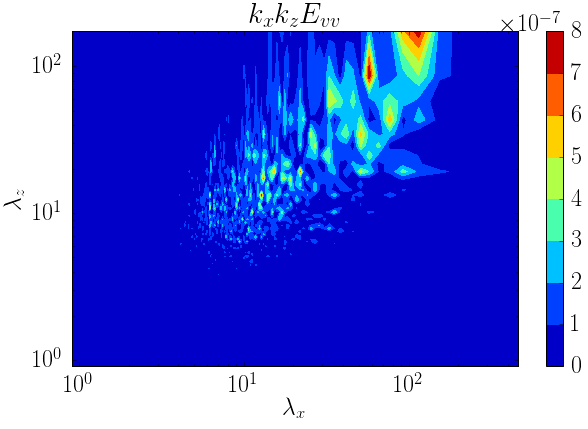

In [107]:
temp = workspe(fspe,nplane) #save the stats on the right place
ivar = 1
print temp['jsp'][nplane]
print temp.keys()
print np.shape(temp['SPEC'])
xlen=10.0;ylen=6
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
print np.shape(temp['SPEC'][:,ivar,:])
myspec = np.zeros([192,512])
print np.shape(myspec)
kx = temp['kx']
kz = temp['kz']
for i in range(0,len(kx)):
    for k in range(0,len(kz)):
        myspec[k,i] = kx[i]*kz[k]*temp['SPEC'][k,ivar,i]
plt.contourf(2.0*np.pi/kx[1:],2.0*np.pi/kz[1:],myspec[1:,1:])
plt.xlabel(r'$\lambda_x$')
plt.ylabel(r'$\lambda_z$')
plt.title(r'$k_x k_z E_{vv}$')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')

In [59]:
#THIS COULD BE ONE BIG FILE WITH ALL SPECTRA??
# Name plane
print fnplane
for ijob in range(njobs):
    [nz,nvar,nx] = np.shape(spes[ijob][0]['SPEC'])
    if ijob==0:
        print nz,nvar,nx
    nspe = len(l_spe_files[ijob])
    v_temp=np.zeros(nspe)
    matriz = np.zeros([nz,nvar,nx,nspe])
    path = p_folders[ijob]+'h5.'+fnplane+'.spes'
    with h5py.File(path,"w",libver='latest') as f:
        f['y']=y
        print "my=%s" %(len(y))
        for variable in l_var_unique:
            f[variable]=spes[ijob][0][variable]
            print "Writing %s = %s, for ijob = %s" %(variable,spes[ijob][0][variable],ijob)
        for variable in l_var_point:
            print "Writing %s" % variable
            for ispe in range(nspe):
                v_temp[ispe] = spes[ijob][ispe][variable]
            #nsta = len(l_sta_files[ijob])
            f[variable]=v_temp
        for variable in l_var_profiles:
            for ispe in range(nspe):
                matriz[:,:,:,ispe]=spes[ijob][ispe][variable]
            f[variable]=matriz

mid
192 12 512
my=851
Writing yjsp = 184.0, for ijob = 0
Writing kx = [ 0.          0.0136295   0.027259    0.0408885   0.054518    0.0681475
  0.081777    0.0954065   0.109036    0.1226655   0.136295    0.1499245
  0.163554    0.1771835   0.190813    0.2044425   0.218072    0.2317015
  0.245331    0.2589605   0.27259     0.2862195   0.299849    0.3134785
  0.327108    0.3407375   0.354367    0.3679965   0.381626    0.39525549
  0.40888499  0.42251449  0.43614399  0.44977349  0.46340299  0.47703249
  0.49066199  0.50429149  0.51792099  0.53155049  0.54517999  0.55880949
  0.57243899  0.58606849  0.59969799  0.61332749  0.62695699  0.64058649
  0.65421599  0.66784549  0.68147499  0.69510449  0.70873399  0.72236349
  0.73599299  0.74962249  0.76325199  0.77688149  0.79051099  0.80414049
  0.81776999  0.83139949  0.84502899  0.85865849  0.87228799  0.88591749
  0.89954699  0.91317649  0.92680599  0.94043549  0.95406499  0.96769449
  0.98132399  0.99495349  1.00858299  1.02221249  1.035841

# Create all planes SPECTRA 

In [60]:
#Need to read how many planes we have!

In [61]:
l_var_unique = ['yjsp','kx','kz','jsp']
vplanes=[]
nmaxplanes=[]
#For each job
for ijob in range(njobs):
    l_var_profiles=[]
    l_var_point=[]
    spes = []
    for j in range(len(l_spe_files[ijob])):
        spes.append([])
    firstfile=l_spe_files[ijob][0]
    kk = workspe(firstfile,-1)
    y = kk['y']
    my = len(y)
    time = kk['time']
    vplanes.append(kk['jsp'])
    nmaxplanes.append(len(vplanes[ijob]))
    for key in kk.keys():
        if key=='SPEC':
            l_var_profiles.append(key)
        elif key=='time':
            l_var_point.append(key)
        #print key,shape(stats[0][0][key]),size(stats[0][0][key])
print l_var_profiles
print l_var_point
print nmaxplanes
print vplanes
#nspec = len(yjsp)


#if nplane == -1:
#    fnplane = 'mid'
#else:
#    nplane=jsp
#    fnplane = "%03d"%nplane

ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
['SPEC']
['time']
[31]
[array([125, 145, 165, 185, 205, 225, 245, 265, 285, 305, 325, 345, 365,
       385, 405, 445, 465, 485, 505, 525, 545, 565, 585, 605, 625, 645,
       665, 685, 705, 725, 426], dtype=uint32)]


In [62]:
for ijob in range(njobs):
    print p_folders[ijob]
    for nplane in range(nmaxplanes[ijob]):
        print "Reading for plane:%s" %(vplanes[ijob][nplane])
        spes=[]
        for fspe,ispe in zip(l_spe_files[ijob],range(len(l_spe_files[ijob]))):
        #temp = workspe(fspe) #save the stats on the right place
            temp = workspe(fspe,nplane) #save the stats on the right place
            spes.append(temp)
        #Read shape of SPECTRA
        [nz,nvar,nx] = np.shape(spes[0]['SPEC'])
        if ijob==0:
            print nz,nvar,nx
        nspe = len(l_spe_files[ijob])
        v_temp=np.zeros(nspe)
        matriz = np.zeros([nz,nvar,nx,nspe])
        if nplane == nmaxplanes[ijob]-1: #Last plane
            fnplane = 'mid'
        else:
            nplane=vplanes[ijob][nplane]
            fnplane = "%03d"%nplane
        print "plane name=%s"%fnplane
        path = p_folders[ijob]+'h5.'+fnplane+'.spes'
             
        with h5py.File(path,"w",libver='latest') as f:
            f['y']=y
            print "my=%s" %(len(y))
            for variable in l_var_unique:
                f[variable]=spes[0][variable]
                print "Writing %s = %s, for ijob = %s" %(variable,spes[0][variable],ijob)
            for variable in l_var_point:
                print "Writing %s" % variable
                for ispe in range(nspe):
                    v_temp[ispe] = spes[ispe][variable]
            #nsta = len(l_sta_files[ijob])
                f[variable]=v_temp
            for variable in l_var_profiles:
                for ispe in range(nspe):
                    matriz[:,:,:,ispe]=spes[ispe][variable]
                f[variable]=matriz
    

/share/drive/toni/VDML/s80/04/
Reading for plane:125
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
ntotr=71424,nx=512,nz=192,nspec=31,nvar=12
n

In [63]:
spes = []
f=[]
matrix = []